# Personality Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

Calculate the age attribute

In [2]:
data = pd.read_csv('personality_analysis.csv', sep=';')
current_year = date.today().year
data['Year_Birth'] = current_year - data['Year_Birth']
data = data.rename(columns={'Year_Birth': 'Age'})
data.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,5524,65,Graduation,Single,58138.0,0,0,4/9/19,58,635,...,0,0,0,0,0,1,NaN,NaN,NaN,NaN
1,2174,68,Graduation,Single,46344.0,1,1,8/3/21,38,11,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,4141,57,Graduation,Together,71613.0,0,0,21/8/20,26,426,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,6182,38,Graduation,Together,26646.0,1,0,10/2/21,26,11,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5324,41,PhD,Married,58293.0,1,0,19/1/21,94,173,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


Show which columns contain NaN values

In [3]:
data.isna().sum()

ID                        0
Age                       0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Response                  0
Unnamed: 27            2240
Unnamed: 28            2240
Unnamed: 29            2240
Unnamed: 30            2240
dtype: int64

Remove the empty columns of the dataset and the null values of the income column


In [4]:
empty_columns = [ 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']
data = data.drop(empty_columns, axis=1)
data = data.dropna()
data.isna().sum()

ID                     0
Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

Outlier Detection

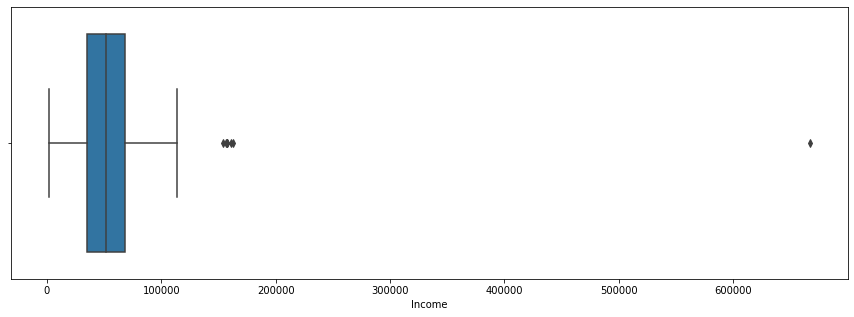

In [5]:
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.boxplot(data=data, x="Income")
plt.show()

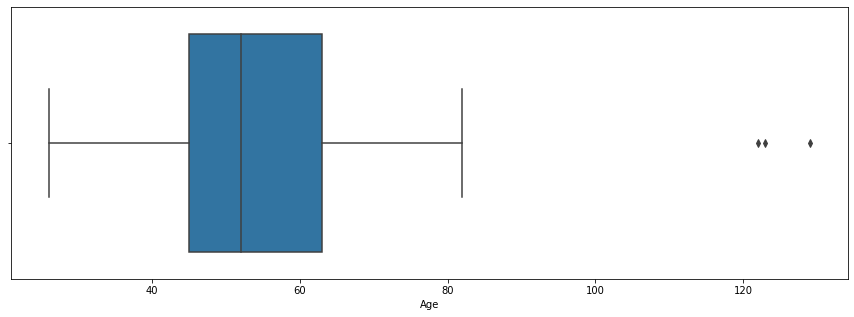

In [6]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=data, x="Age")
plt.show()

In [7]:
def remove_outliers(data, attr):
    # Calculate IQR
    Q1 = data[attr].describe()['25%']
    Q3 = data[attr].describe()['75%']
    IQR = Q3 - Q1

    # Calculate lower and upper outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate outliers
    data = data.loc[data[attr] > lower_bound]
    data = data.loc[data[attr] < upper_bound]

    return data

In [8]:
data = remove_outliers(data, "Income")
data = remove_outliers(data, "Age")
data

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,65,Graduation,Single,58138.0,0,0,4/9/19,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,68,Graduation,Single,46344.0,1,1,8/3/21,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,57,Graduation,Together,71613.0,0,0,21/8/20,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,38,Graduation,Together,26646.0,1,0,10/2/21,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,41,PhD,Married,58293.0,1,0,19/1/21,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,55,Graduation,Married,61223.0,0,1,13/6/20,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,76,PhD,Together,64014.0,2,1,10/6/21,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,41,Graduation,Divorced,56981.0,0,0,25/1/21,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,66,Master,Together,69245.0,0,1,24/1/21,8,428,...,5,10,3,0,0,0,0,0,0,0


Save the clean file

In [9]:
data.to_csv("../input_data/personality_analysis_clean.csv", index=False, encoding='utf-8-sig', sep=";")